# EDA - 3. Distribucion de Variables


In [6]:
conda install seaborn -c conda-forge

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 4.13.0
  latest version: 22.9.0

Please update conda by running

    $ conda update -n base conda




In [7]:

pip install -U pandasql


Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)
import pandasql as ps

In [9]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (12,12)


Lectura de datos

In [10]:
accidentes = pd.read_csv("accidentes.2.limpio_analisis.csv")

In [11]:

accidentes.dtypes

ID                    object
Severity               int64
Start_Time            object
End_Time              object
Start_Lat            float64
Start_Lng            float64
Distance(mi)         float64
Street                object
Side                  object
City                  object
County                object
State                 object
Temperature(F)       float64
Wind_Chill(F)        float64
Humidity(%)          float64
Pressure(in)         float64
Visibility(mi)       float64
Wind_Speed(mph)      float64
Precipitation(in)    float64
Weather_Condition     object
Amenity                 bool
Bump                    bool
Crossing                bool
Give_Way                bool
Junction                bool
No_Exit                 bool
Railway                 bool
Roundabout              bool
Station                 bool
Stop                    bool
Traffic_Calming         bool
Traffic_Signal          bool
Turning_Loop            bool
Sunrise_Sunset        object
Civil_Twilight

# Correlación


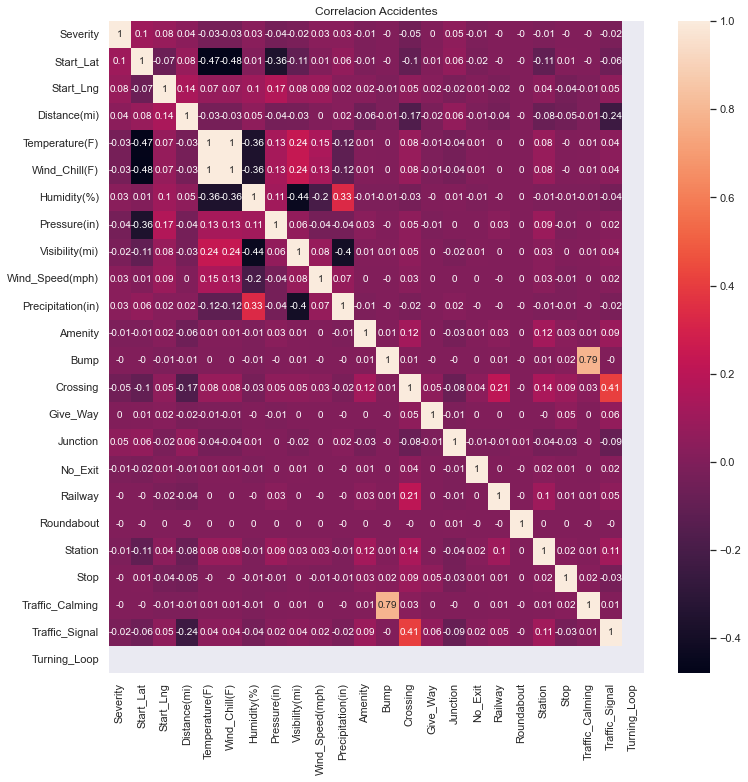

In [12]:
matrix = accidentes.corr(
    method = 'spearman',  
    min_periods = 1     
).round(2)
sns.heatmap(matrix, annot=True)
plt.title("Correlacion Accidentes")
plt.show()

# Distribución de variables numericas




Grafico de barras mostrando la cantidad de accidente por Severidad (2,3,4)

Text(0, 0.5, 'Cantidad')

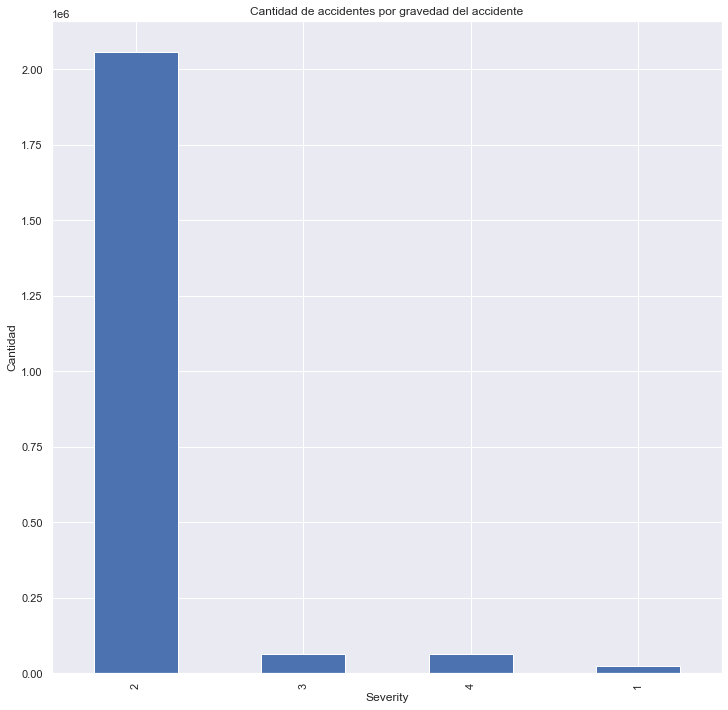

In [27]:
accidentes.Severity.value_counts().plot(kind = "bar")
plt.title("Cantidad de accidentes por gravedad del accidente")
plt.xlabel('Severity') 
plt.ylabel ('Cantidad')

Gráfico de barras mostrando la cantidad de accidentes por año


In [14]:
qyear = "SELECT SUBSTRING(Start_Time, 1, 4) FROM accidentes"


year= ps.sqldf(qyear, locals())

year

,"SUBSTRING(Start_Time, 1, 4)"
0,2016
1,2016
2,2016
3,2016
4,2016
...,...
2207333,2019
2207334,2019
2207335,2019
2207336,2019


Text(0, 0.5, 'Cantidad')

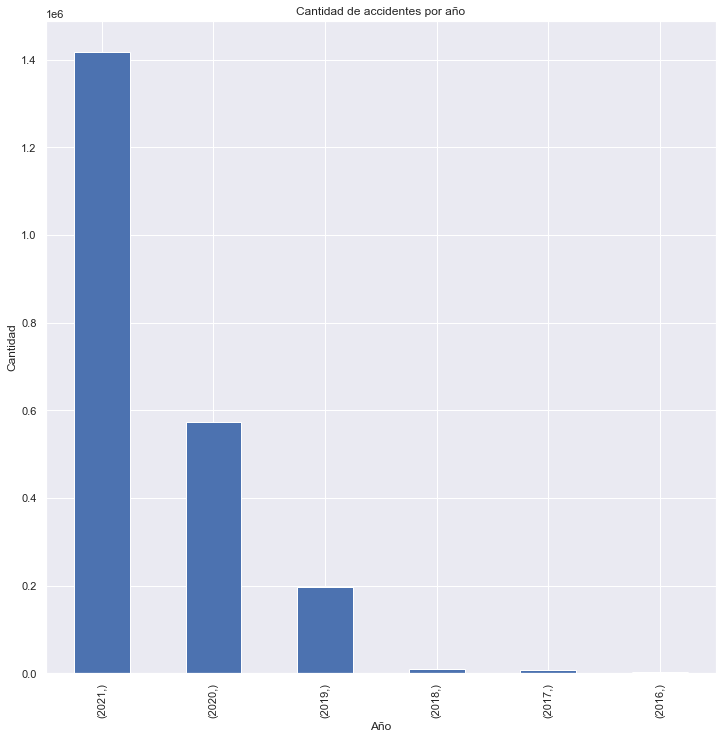

In [28]:
year.value_counts().plot(kind = "bar")
plt.title("Cantidad de accidentes por año")
plt.xlabel('Año') 
plt.ylabel ('Cantidad')

Grafico de barras mostrando la cantidad de accidentes por mes en los años 2021, 2017, 2016. Realizamos el analisis unicamente en estos años porque son los que tienen mas datos

In [16]:
year.value_counts()

SUBSTRING(Start_Time, 1, 4)
2021                           1417342
2020                            573607
2019                            196135
2018                              9294
2017                              7490
2016                              3470
dtype: int64

Text(0, 0.5, 'Cantidad')

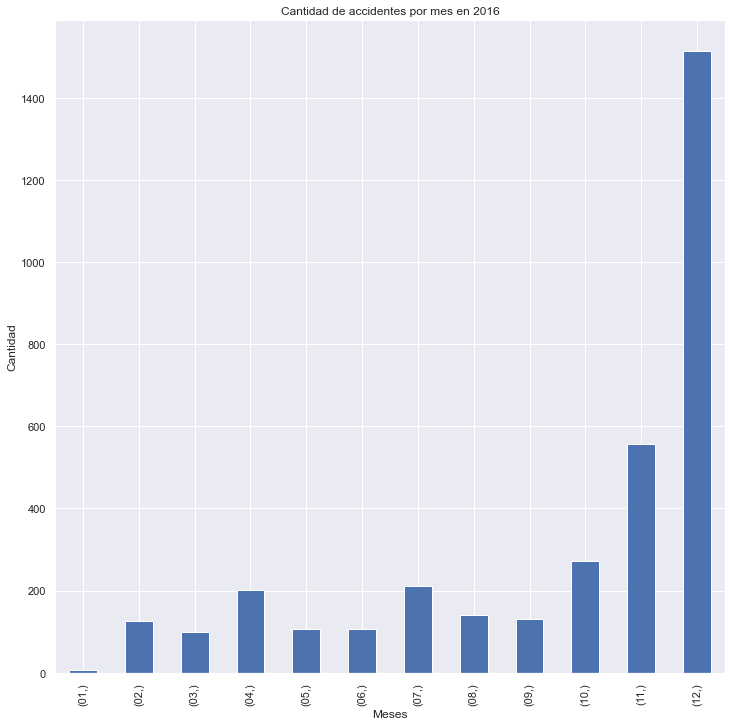

In [17]:
qmes16 = "SELECT SUBSTRING(Start_Time, 6, 2) FROM accidentes WHERE SUBSTRING(Start_Time, 1, 4) = '2016' ORDER BY SUBSTRING(Start_Time, 6, 2) ASC"
mes16 = ps.sqldf(qmes16, locals())

mes16.value_counts().sort_index().plot(kind = "bar")
plt.title('Cantidad de accidentes por mes en 2016')
plt.xlabel('Meses') 
plt.ylabel ('Cantidad')


Text(0, 0.5, 'Cantidad')

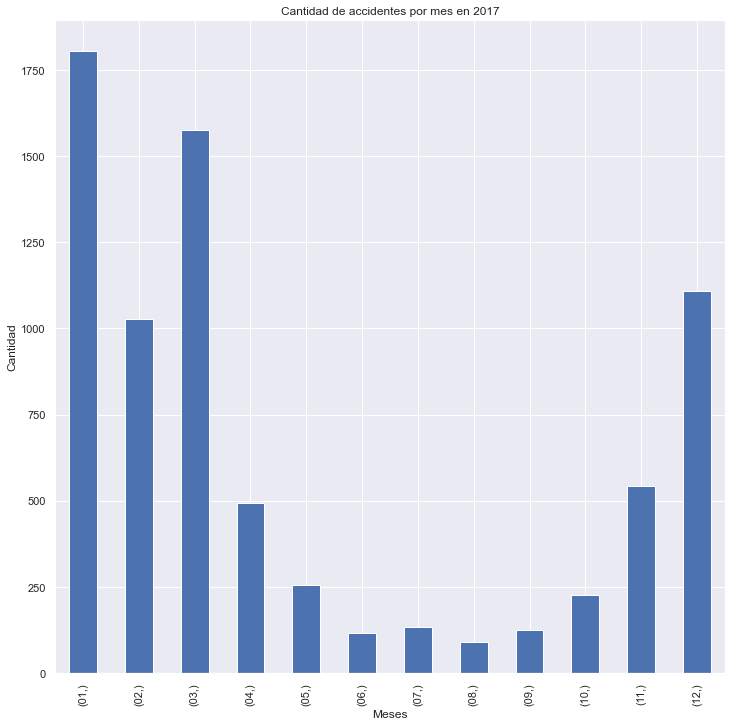

In [18]:
qmes17 = "SELECT SUBSTRING(Start_Time, 6, 2) FROM accidentes WHERE SUBSTRING(Start_Time, 1, 4) = '2017' "
mes17 = ps.sqldf(qmes17, locals())

mes17.value_counts().sort_index().plot(kind = "bar")
plt.title('Cantidad de accidentes por mes en 2017')
plt.xlabel('Meses') 
plt.ylabel ('Cantidad')

Text(0, 0.5, 'Cantidad')

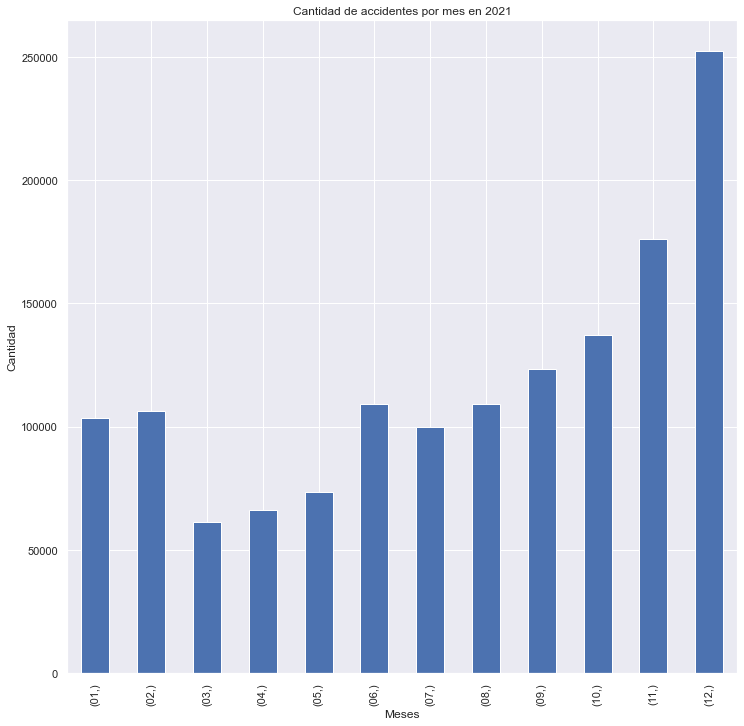

In [19]:
qmes21 = "SELECT SUBSTRING(Start_Time, 6, 2) FROM accidentes WHERE SUBSTRING(Start_Time, 1, 4) = '2021' ORDER BY SUBSTRING(Start_Time, 6, 2) ASC"
mes21= ps.sqldf(qmes21, locals())

mes21.value_counts().sort_index().plot(kind = "bar")
plt.title('Cantidad de accidentes por mes en 2021')
plt.xlabel('Meses') 
plt.ylabel ('Cantidad')

Como conclusión la cantidad de accidentes incrementa a medida que avanza el año. Y tiene un incremento notorio presente en lso 3 años en diciembre

**Grafico de linea mostrando la distribucion horaria de los accidentes**


In [20]:
accidentes.Start_Time

0          2016-02-08 00:37:08
1          2016-02-08 07:53:43
2          2016-02-08 11:51:46
3          2016-02-08 15:16:43
4          2016-02-08 15:43:50
                  ...         
2207333    2019-08-23 18:03:25
2207334    2019-08-23 19:11:30
2207335    2019-08-23 19:00:21
2207336    2019-08-23 19:00:21
2207337    2019-08-23 18:52:06
Name: Start_Time, Length: 2207338, dtype: object

Text(0, 0.5, 'Cantidad')

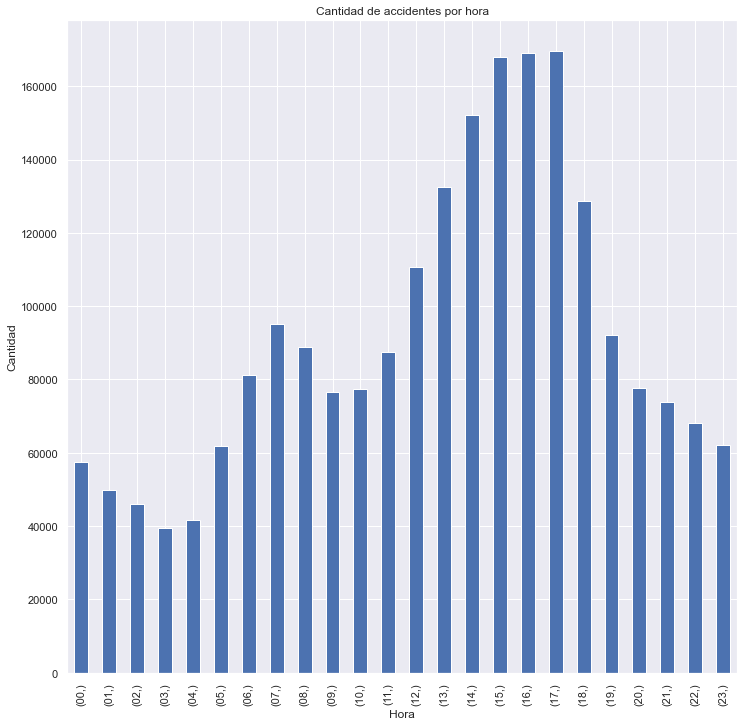

In [21]:
qhora = "SELECT SUBSTRING(Start_Time, 12, 2) FROM accidentes ORDER BY SUBSTRING(Start_Time, 12, 2) DESC"
hora= ps.sqldf(qhora, locals())

hora.value_counts().sort_index().plot(kind = "bar")
plt.title('Cantidad de accidentes por hora')
plt.xlabel('Hora') 
plt.ylabel ('Cantidad')

Como se puede observar la mayor cantidad de accidentes ocurren entre las 12 y las 18 horas, y esto coincide con el fin de la jornada laboral

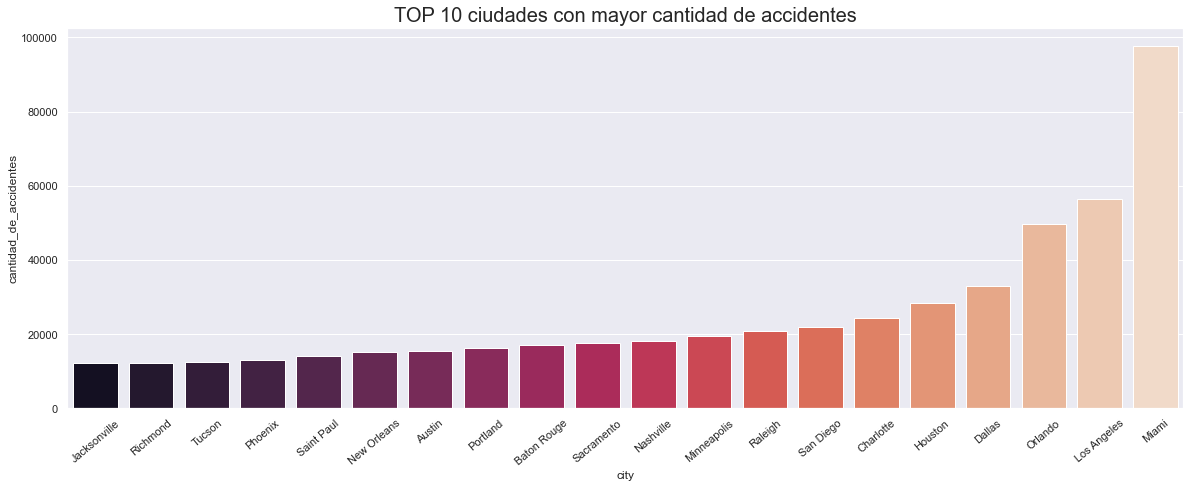

In [22]:
top_cities=accidentes["City"].value_counts().sort_values()[-20:].reset_index()
top_cities.columns=["city","cantidad_de_accidentes"]

plt.figure(figsize=(20,7))
sns.barplot(x="city",y="cantidad_de_accidentes",data=top_cities , palette='rocket')
plt.title("TOP 10 ciudades con mayor cantidad de accidentes",fontsize=20)
plt.xticks(rotation=40)
plt.show()

# Mapa


In [23]:
pip install folium

In [24]:
from folium import plugins
import folium

No logramos realizar el mapa con toda la base de datos, por extension de la misma, pero a modo de referencia usamos una base mas pequeña para visualizar una muestra significativa.

A continuacion separamos el CSV en dos partes y utilizamos la libreria Folium para relizar el mapa mostrando la cantidad de accidentes en cada Estado

In [25]:

#csv file name to be read in 

in_csv = 'accidentes.2.limpio_analisis.csv'


#get the number of lines of the csv file to be read

number_lines = sum(1 for row in (open(in_csv)))

#size of rows of data to write to the csv, 

#you can change the row size according to your need

rowsize = 100000
12
13
#start looping through data writing it to a new file for each set
14
for i in range(0,number_lines,rowsize):

    df = pd.read_csv(in_csv,

          header=None,

          nrows = rowsize,#number of rows to read at each loop

          skiprows = i)#skip rows that have been read


    #csv to write data to a new file with indexed name. input_1.csv etc.

    out_csv = 'input' + str(i) + '.csv'


    df.to_csv(out_csv,

          index=False,

          header=False,
          mode='a',#append data to csv file

          chunksize=rowsize)#size of data to append for each loop

C:\Users\clara\AppData\Local\Temp\ipykernel_1372\617248048.py:21: DtypeWarning: Columns (1,4,5,6,12,13,14,15,16,17,18,20,21,22,23,24,25,26,27,28,29,30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(in_csv,


In [29]:
acc = pd.read_csv("input0.csv")

In [ ]:
from folium import plugins

map_2 = folium.Map(tiles='OpenStreetMap',
 zoom_start=12)

points = plugins.MarkerCluster().add_to(map_2)

for lat, lng, label, in zip(acc.Start_Lat, acc.Start_Lng, acc.State):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(points)

map_2

In [32]:
conda install -c conda-forge ipywidgets

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 4.13.0
  latest version: 22.9.0

Please update conda by running

    $ conda update -n base conda




In [33]:
from ipywidgets import interact
from ipywidgets import interact, fixed

In [34]:
columnas_bool = accidentes.select_dtypes(['bool']).columns

In [35]:

def grafico_variable(col1):
    accidentes[col1].value_counts().plot(kind = "barh")
    plt.title("Cantidad de accidentes causados por {}".format(col1))


In [36]:
interact(grafico_variable, col1 = columnas_bool, df = fixed(accidentes))

interactive(children=(Dropdown(description='col1', options=('Amenity', 'Bump', 'Crossing', 'Give_Way', 'Juncti…

<function __main__.grafico_variable(col1)>

# CONCLUSION

A lo largo del trabajo pudimos analizar ciertas perspectivas del historico de accidentes autoovilisticos de Estados Unidos. Encontramos tendencias a lo largo de los años, meses. TAmbien pudimos observar la cantidad de accidentes y su respectiva causa. 

Nuestra conlusion mas significativa que dedujimos es que la mayor cantidad de accidentes tienden a ser a finde de año, especialmente en Octubre, Noviembre y Diciembre.

**MUCHAS GRACIAS**

**MANUEL PEREDA Y CLARA THAYS**